In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Daten generieren
data = {
  'Datum': pd.date_range(start='1/1/2020', periods=1000),
  'Temperatur': pd.Series(20 + np.random.randn(1000).cumsum())
}

df = pd.DataFrame(data).set_index('Datum')
df
print('Shape:', df.shape)
df.head()

Shape: (1000, 1)


,Temperatur
Datum,
2020-01-01,20.745773
2020-01-02,19.746801
2020-01-03,20.340690
2020-01-04,19.025730
2020-01-05,19.317440


In [4]:
def ad_test(data):
    dftest = adfuller(data, autolag='AIC')
    print('1. ADF: ', dftest[0])
    print('2. p-value: ', dftest[1])
    print('3. No. of lags: ', dftest[2])
    print('4. No. of observations used for ADF regression and critical values calculation: ', dftest[3])
    print('5. Critical values: ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [5]:
ad_test(df['Temperatur'])

1. ADF:  -1.6203844542801
2. p-value:  0.472527748933211
3. No. of lags:  2
4. No. of observations used for ADF regression and critical values calculation:  997
5. Critical values: 
	 1% :  -3.4369259442540416
	 5% :  -2.8644432969122833
	 10% :  -2.5683158550174094


In [6]:
# ARIMA-Modell anpassen


import warnings
warnings.filterwarnings('ignore')

In [7]:
stepwise_fit=auto_arima(df['Temperatur'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2773.548, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2773.365, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2774.851, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2774.778, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2775.466, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2772.868, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2772.977, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2773.005, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2772.561, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2773.690, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2774.997, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2775.515, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.955 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1382.281
Date:                Sun, 14 Apr 2024   AIC                           2772.561
Time:                        13:25:52   BIC                           2792.188
Sample:                    01-01-2020   HQIC                          2780.021
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0619      0.028     -2.236      0.025      -0.116      -0.008
ma.L1         -0.0284      0.033     -0.872      0.383      -0.092       0.035
ma.L2         -0.0673      0.032     -2.075      0.038      -0.131      -0.004
sigma2         0.9319      0.039     23.852      0.000       0.855       1.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.84
Prob(Q):                              0.95   Prob(JB):                         0.05
Heteroskedasticity (H):               0.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(df.shape)
train = df.iloc[:-300]
test = df.iloc[-300:]
print(train.shape, train.shape)

(1000, 1)
(700, 1) (700, 1)


In [9]:
model=ARIMA(train['Temperatur'],order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Temperatur   No. Observations:                  700
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -967.207
Date:                Sun, 14 Apr 2024   AIC                           1942.413
Time:                        13:25:53   BIC                           1960.612
Sample:                    01-01-2020   HQIC                          1949.448
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5543      0.856      0.647      0.518      -1.124       2.233
ma.L1         -0.5395      0.856     -0.631      0.528      -2.216       1.137
ma.L2         -0.0353      0.038     -0.920      0.358      -0.111       0.040
sigma2         0.9319      0.050     18.559      0.000       0.834       1.030
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.77   Prob(JB):                         0.12
Heteroskedasticity (H):               0.98   Skew:                            -0.19
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Datum
2021-12-01   -47.402096
2021-12-02   -47.420092
2021-12-03   -47.430067
2021-12-04   -47.435597
2021-12-05   -47.438662
                ...    
2022-09-22   -47.442474
2022-09-23   -47.442474
2022-09-24   -47.442474
2022-09-25   -47.442474
2022-09-26   -47.442474
Name: predicted_mean, Length: 300, dtype: float64


In [11]:
test['Temperatur'].mean()

-40.47460535782311

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Temperatur']))
print(rmse)

8.833247942893555


In [13]:
model2=ARIMA(df['Temperatur'],order=(1,1,2))
model2=model2.fit()
df.tail()

,Temperatur
Datum,
2022-09-22,-39.780372
2022-09-23,-40.218338
2022-09-24,-40.436602
2022-09-25,-40.160493
2022-09-26,-41.259100


In [14]:
index_future_dates=pd.date_range(start='1/3/2020',end='1/31/2020')
pred=model2.predict(start=len(df),end=len(df)+28,typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2020-01-03   -41.249433
2020-01-04   -41.188871
2020-01-05   -41.163705
2020-01-06   -41.153247
2020-01-07   -41.148901
2020-01-08   -41.147095
2020-01-09   -41.146345
2020-01-10   -41.146033
2020-01-11   -41.145904
2020-01-12   -41.145850
2020-01-13   -41.145827
2020-01-14   -41.145818
2020-01-15   -41.145814
2020-01-16   -41.145813
2020-01-17   -41.145812
2020-01-18   -41.145812
2020-01-19   -41.145812
2020-01-20   -41.145812
2020-01-21   -41.145811
2020-01-22   -41.145811
2020-01-23   -41.145811
2020-01-24   -41.145811
2020-01-25   -41.145811
2020-01-26   -41.145811
2020-01-27   -41.145811
2020-01-28   -41.145811
2020-01-29   -41.145811
2020-01-30   -41.145811
2020-01-31   -41.145811
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Date', ylabel='Temperatur'>

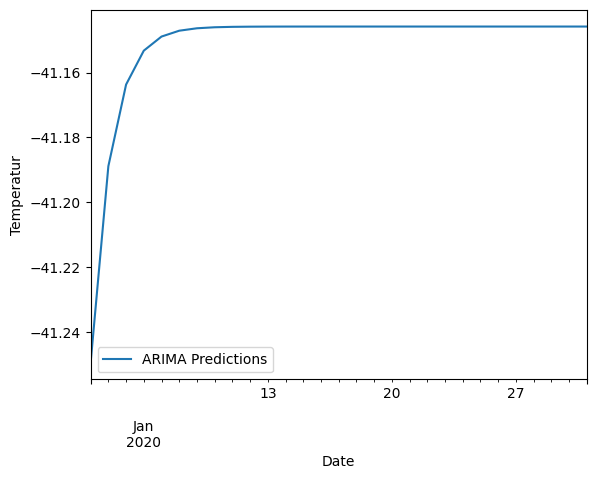

In [15]:
pred.plot(legend=True,xlabel='Date',ylabel='Temperatur')